<a href="https://colab.research.google.com/github/RalfH1388/genai-lecture/blob/main/california.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Clustering
# ----------
# Fragestellung: wie lassen sich Regionen Kaliforniens bzgl. ihrer Einkommen
# clustern?

In [268]:
# Dieser Code muss nicht verstanden werden, er stellt lediglich sicher, dass
# alle Ausgaben einer Zelle angezeigt werden (und nicht nur die letzte).
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [310]:
# Wir lesen die Datei direkt aus GitHub ein (Vorteil: man muss die Datei nicht
# jedes Mal wieder in den temporären Speicher von Google Colab ablegen).
import pandas as pd
url = "https://raw.githubusercontent.com/RalfH1388/genai-lecture/main/california.xlsx"
dat = pd.read_excel(url)

In [276]:
# Alternative: Wir lesen den Datensatz direkt aus Google Colab
#import pandas as pd
#dat = pd.read_excel('california.xlsx')

In [311]:
# Wir schauen uns die Eigenschaften des Datensatzes an, und schmeißen Zeilen
# mit leeren Werten raus. Des weiteren betrachten wir für unsere Fragestellung
# nur Längen- und Breitengrad sowie Einkommen
dat.head()
dat.shape
daten = dat[['Längengrad', 'Breitengrad', 'Einkommen (Median)']]
daten.shape
daten = daten.dropna()
daten.head()
daten.shape

,Längengrad,Breitengrad,Alter Bewohner (Median),Anzahl Zimmer,Anzahl Schlafzimmer,Anzahl Bewohner,Anzahl Haushalte,Einkommen (Median)
0,-120.54,38.41,21,1435,294.0,668,267,2.5667
1,-117.10,32.70,28,633,137.0,525,170,3.6042
2,-118.43,37.40,19,2460,405.0,1225,425,4.1576
3,-116.50,33.82,16,343,85.0,29,14,2.1042
4,-121.89,37.23,16,3574,466.0,1503,487,8.1988


(20640, 8)

(20640, 3)

,Längengrad,Breitengrad,Einkommen (Median)
0,-120.54,38.41,2.5667
1,-117.10,32.70,3.6042
2,-118.43,37.40,4.1576
3,-116.50,33.82,2.1042
4,-121.89,37.23,8.1988


(20640, 3)

In [312]:
# Nun lassen wir zunächst den in sklearns vordefinierten Clustering-Algorithmus
# arbeiten. Vorher müssen wir die ideale Clusterzahl bestimmen.
# Hierfür lassen wir Kandidaten für k von 1 bis 10 durchlaufen, machen für jedes
# k ein Clustering und betrachten jeweils die Variabilität innerhalb der Cluster
# mittels des Parameters "inertia_".

from sklearn.cluster import KMeans

variabilitaet = []

K = range(1,10)

for k in K:
  kMeanModel = KMeans(n_clusters = k)
  kMeanModel.fit(daten)
  variabilitaet.append(kMeanModel.inertia_)

KMeans(n_clusters=1)

KMeans(n_clusters=2)

KMeans(n_clusters=3)

KMeans(n_clusters=4)

KMeans(n_clusters=5)

KMeans(n_clusters=6)

KMeans(n_clusters=7)

KMeans()

KMeans(n_clusters=9)

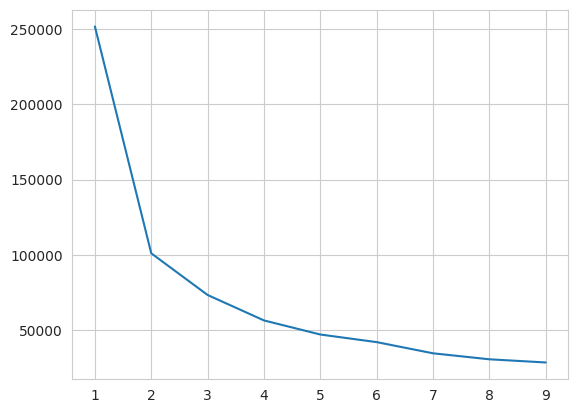

In [313]:
# Nun können wir selber einen Scree-Plot erzeugen, wo wir an Hand der Ellbogen-
# Methode die ideale Zahl an Clustern ermitteln. Dazu nutzen wir matplotlib
# und zeichnen K und variabilitaet in ein x-y-Diagramm.
import matplotlib.pyplot as plt
plt.plot(K, variabilitaet)

In [273]:
# Der klarste Ellbogen ist bei k=2. Man kann grundsätzlich auch argumentieren,
# dass bei k=3 und k=4 auch nochmal Kandidaten sind. Wir entscheiden uns hier
# aus didaktischen Gründen für k=4. Außerdem verzichten wir auf Skalierung der
# Daten (auf je unterschiedlicheren Skalen die Daten sind, desto nötiger), weil
# wir dann (ebenfalls aus didaktischen Gründen) das Gefühl für die absoluten
# Werte von Längengrad, Breitengrad und Einkommen verlieren.

In [320]:
# Wir trainieren also jetzt ein Clustering mit 4 Clustern auf den gegebenen
# Datensatz
kMeanModel = KMeans(n_clusters = 4)
# später einfügen, wenn der manuelle Algorithmus überprüft werden soll, sprich
# wir zwingen hier die Funktion aus sklearn, unsere initialen Clusterzentren
# zu verwenden, um sicherzustellen, dass wir das selbe Ergebnis erhalten.
#kMeanModel = KMeans(n_clusters = 4, init = initiale_clusterzentren)

# kMeanModel hat weitere nützliche Eigenschaften, z.B. können wir uns die Lage
# der Clusterzentren ausgeben lassen mit cluster_centers_, können uns die Anzahl
# an Iterationen (= Anzahl Wiederholungen von Schritt 2 und 3 im Skript)
# angeben lassen mit n_iter_, und können uns sogar die Clusterzuordnung
# anschauen, die der Algorithmus für jede Zeile (=Wohngegend) vorgenommen hat
# (hierbei benennt sklearn die Cluster default-mäßig von 0 an aufsteigend).
kMeanModel.fit(daten)
kMeanModel.cluster_centers_
kMeanModel.n_iter_
kMeanModel.labels_[:50]

KMeans(init=array([[-120.54  ,   38.41  ,    2.5667],
       [-117.1   ,   32.7   ,    3.6042],
       [-118.43  ,   37.4   ,    4.1576],
       [-116.5   ,   33.82  ,    2.1042]]),
       n_clusters=4)

array([[-121.62607737,   38.06638655,    2.91948021],
       [-118.05699192,   33.86701057,    6.35910516],
       [-121.95287029,   37.66278243,    6.12833946],
       [-117.9883404 ,   33.96662808,    3.02202362]])

15

array([0, 3, 0, 3, 2, 0, 3, 0, 1, 0, 0, 3, 0, 3, 3, 3, 3, 2, 0, 3, 0, 1,
       2, 0, 0, 0, 2, 1, 3, 2, 3, 1, 1, 0, 3, 3, 3, 1, 3, 0, 0, 0, 0, 2,
       0, 3, 0, 2, 0, 3], dtype=int32)

In [315]:
# Da es im Zuge der zunehmenden Automatisierung von Verarbeitungsschritten
# immer wichtig er wird, zu verstehen, was "unter der Haube" los ist, wollen
# wir die sklearn-Berechnung selber nachrechnen.
# Dazu definieren wir einfach die ersten vier Punkte unseres Datensatzes
# als die vier initialen Clusterzentren.
# Außerdem müssen wir alles in einen Array umwandeln, da dies einfacher zu
# rechnen ist.
import numpy as np
daten[:4]
initiale_clusterzentren = daten[:4]
initiale_clusterzentren = np.array(initiale_clusterzentren)
initiale_clusterzentren

,Längengrad,Breitengrad,Einkommen (Median)
0,-120.54,38.41,2.5667
1,-117.10,32.70,3.6042
2,-118.43,37.40,4.1576
3,-116.50,33.82,2.1042


array([[-120.54  ,   38.41  ,    2.5667],
       [-117.1   ,   32.7   ,    3.6042],
       [-118.43  ,   37.4   ,    4.1576],
       [-116.5   ,   33.82  ,    2.1042]])

In [316]:
# Die selbe Umwandlung in einen Array müssen wir natürlich auch mit dem gesamen
# Datensatz machen.
daten_array = np.array(daten)
daten_array[:10]

array([[-120.54  ,   38.41  ,    2.5667],
       [-117.1   ,   32.7   ,    3.6042],
       [-118.43  ,   37.4   ,    4.1576],
       [-116.5   ,   33.82  ,    2.1042],
       [-121.89  ,   37.23  ,    8.1988],
       [-124.14  ,   40.59  ,    2.178 ],
       [-120.44  ,   34.97  ,    3.7589],
       [-122.11  ,   37.7   ,    2.4206],
       [-118.5   ,   34.52  ,    5.9263],
       [-122.26  ,   37.83  ,    2.0978]])

In [321]:
# Nun setzen wir die aktuellen Clusterzentren zu Beginn auf die initialen,
# da diese sich ja ständig ändern, und wir aber die Werte der initialen
# Clusterzentern uns für später aufheben wollen (sprich: wir wollen sie nicht
# überschreiben mit neuen Werten):

aktuelle_clusterzentren = initiale_clusterzentren

In [318]:
# Nun brauchen wir eine Funktion, die uns den euklidischen Abstand berechnet.
# Hier machen wir es uns einfach und verwenden die vorgefertige Funktion "norm"
# aus dem entsprechenden Paket
from numpy.linalg import norm

In [336]:
# Nun müssen wir händisch Schritt 2 (Zuordnung Punkte zu Clustern mittels
# euklidischem Abstand)und Schritt 3 (Neubrechnung der aktuellen Clusterzentren)
# programmieren. Die Idee ist folgende:
# - eine äußere for-Schleife geht durch alle Punkte des Datensatzes durch
# - eine innere for-Schleife berechnet für jeden dieser Punkte den Abstand
#   zu jedem Clusterzentrum
# - danach wird der Index des kleinsten Abstand ermittelt mit argmin, sprich:
#   wenn der kleinste Abstand bei Index 2 ist, gehört der Punkt auch ins Cluster
#   2 (merke: die Cluster werden bei 0 beginnend benannt)
# anschließend sind nach beiden for-Schleifen alle Punkte einem Cluster
# zugeordnet; wir heften dann die Spalte, in der die Nummern der Cluster stehen
# (zugewiesene_clusterzentren) an den bisherigen Datensatz an; dann teilen wir
# den Datensatz in vier Teildatensätze auf, pro Cluster ein Datensatz; dies
# machen wir, da wir nun ganz einfach den Mittelwert (=neue Clusterzentren) pro
# Datensatz bestimmen können mit mean. Zuletzt packen wir alle vier Teildaten-
# sätze wieder in einen, geben das Ergebnis aus und vergleichen es mit dem
# Ergebnis von sklearn.

# Natürlich ist dies nicht effizient programmiert. Aber es ist so programmiert,
# dass es didaktisch gut verstanden werden kann.

# Da wir hier nur EINE Iteration programmiert haben, müssen wir die Zeile jetzt
# so oft ausführen, wie sklearn an Iterationen gebraucht hat. Dann müssen wir
# allerdings die Zelle oben von sklearn nochhmal ausführen und ihn dazu zwingen,
# die selben initialen Clusterzentren zu verwenden wie wir hier, also:
# Wieder hoch scrollen, die erste kMeanModel-Zeile kommentieren und die darunter
# auskommentieren, und nochmal die Zelle mit
# aktuelle_clusterzentren = initiale_clusterzentren
# ausführen; dann nochmal hierher zurückkehren und den Code 15-mal ausführen.

zugewiesene_clusterzentren = []

for i in daten_array:
  abstand = []
  for j in aktuelle_clusterzentren:
    abstand.append(norm(i-j))
  zugewiesene_clusterzentren.append(np.argmin(abstand))
daten_cluster = np.column_stack((daten_array, np.array(zugewiesene_clusterzentren)))
daten_cluster_0 = daten_cluster[daten_cluster[:, 3] == 0]
daten_cluster_1 = daten_cluster[daten_cluster[:, 3] == 1]
daten_cluster_2 = daten_cluster[daten_cluster[:, 3] == 2]
daten_cluster_3 = daten_cluster[daten_cluster[:, 3] == 3]
clusterzentrum_cluster_0 = np.mean(daten_cluster_0, axis = 0)
clusterzentrum_cluster_1 = np.mean(daten_cluster_1, axis = 0)
clusterzentrum_cluster_2 = np.mean(daten_cluster_2, axis = 0)
clusterzentrum_cluster_3 = np.mean(daten_cluster_3, axis = 0)
aktuelle_clusterzentren = np.array([clusterzentrum_cluster_0, clusterzentrum_cluster_1, clusterzentrum_cluster_2, clusterzentrum_cluster_3])
aktuelle_clusterzentren = np.delete(aktuelle_clusterzentren, 3, axis=1)
aktuelle_clusterzentren
kMeanModel.cluster_centers_

array([[-121.62607737,   38.06638655,    2.91948021],
       [-118.05699192,   33.86701057,    6.35910516],
       [-121.95287029,   37.66278243,    6.12833946],
       [-117.9883404 ,   33.96662808,    3.02202362]])

array([[-121.62607737,   38.06638655,    2.91948021],
       [-118.05699192,   33.86701057,    6.35910516],
       [-121.95287029,   37.66278243,    6.12833946],
       [-117.9883404 ,   33.96662808,    3.02202362]])

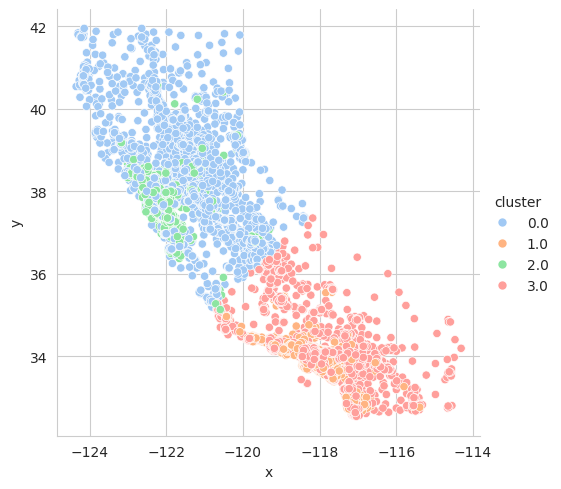

In [337]:
# Nun können wir das Ergebnis noch plotten (was genau hier passiert, muss nicht
# zwingend verstanden werden).
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(daten_cluster, columns=["x", "y", "z", "cluster"])
sns.set_style('whitegrid')
sns.relplot(x="x", y="y", hue="cluster", data=df, palette="pastel", kind='scatter')
plt.show()